In [1]:
import os
from PIL import Image
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

%matplotlib inline

SMALL_SIZE = 11
MEDIUM_SIZE = 12
BIGGER_SIZE = 13

plt.rcParams['axes.facecolor']='white'
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
# Prepare lists to store the flattened images and labels
flattened_images = []
labels = []

# Loop over each file in the directory
for filename in os.listdir("Images"):
    file_path = os.path.join("Images", filename)
    with Image.open(file_path) as img:
        flattened_img = np.array(img).flatten()
        flattened_images.append(flattened_img)
        # Extract the class label from the filename
        # Example filename: yaleB01_P00A+000E+00.png
        # Extract '01' from 'yaleB01', which is the subject ID
        label = filename.split('_')[0]
        label = label[5:7]
        labels.append(label)

# Convert lists to numpy arrays
image_matrix = np.array(flattened_images)
label_array = np.array(labels)

print("Image matrix shape:", image_matrix.shape)
print("Labels array shape:", label_array.shape)

Image matrix shape: (2414, 32256)
Labels array shape: (2414,)


In [3]:
# Unique classes in the dataset
unique_classes = np.unique(labels)

# Initialize lists to hold the split results
X_train_list = []
X_test_list = []
y_train_list = []
y_test_list = []

train_indices = []
test_indices = []

for cls in unique_classes:
    indices = np.where(label_array == cls)[0]
    train_idx, test_idx = train_test_split(indices, train_size=0.75, random_state=42, shuffle=True)
    train_indices.extend(train_idx)
    test_indices.extend(test_idx)

# Use the indices to split both the original and transformed datasets
X_train = image_matrix[train_indices]
X_test = image_matrix[test_indices]
y_train = label_array[train_indices]
y_test = label_array[test_indices]

In [4]:
def evaluate_model(classifier, X_train, y_train, X_test, y_test):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot = True, fmt='d', cmap = 'Blues', xticklabels = unique_classes, yticklabels = unique_classes)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    return classifier

In [7]:
pca = PCA(n_components = 20)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

logistic_classifier = LogisticRegression(random_state = 42, C = 0.005, max_iter = 250)
svm_classifier = SVC(kernel = 'linear', random_state = 42, C = 0.001, max_iter = 250)

C:\Users\korki\anaconda3\envs\mnlp\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

          01       0.92      0.75      0.83        16
          02       0.72      0.81      0.76        16
          03       0.88      0.88      0.88        16
          04       0.85      0.69      0.76        16
          05       0.94      1.00      0.97        16
          06       0.65      0.69      0.67        16
          07       0.79      0.69      0.73        16
          08       0.81      0.81      0.81        16
          09       0.88      0.88      0.88        16
          10       0.79      0.69      0.73        16
          11       0.92      0.80      0.86        15
          12       0.62      0.67      0.65        15
          13       0.69      0.73      0.71        15
          15       0.86      0.75      0.80        16
          16       1.00      0.50      0.67        16
          17       0.69      0.69      0.69        16
          18       0.65      0.81      0.72

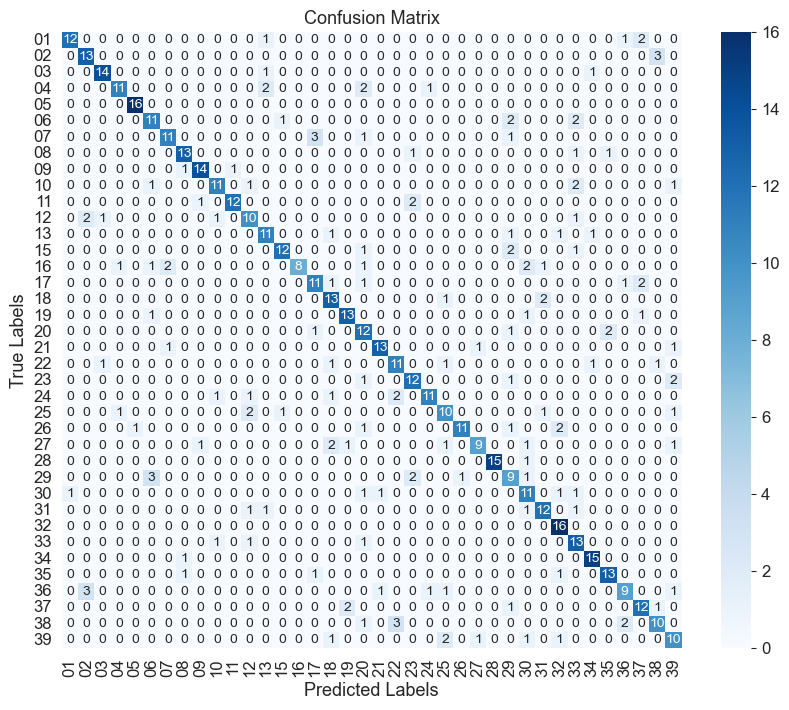

LogisticRegression(C=0.005, max_iter=250, random_state=42)

In [8]:
evaluate_model(logistic_classifier, X_train_pca, y_train, X_test_pca, y_test)

C:\Users\korki\anaconda3\envs\mnlp\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

          01       0.80      1.00      0.89        16
          02       0.92      0.75      0.83        16
          03       0.88      0.94      0.91        16
          04       0.76      0.81      0.79        16
          05       1.00      1.00      1.00        16
          06       0.52      0.94      0.67        16
          07       0.65      0.94      0.77        16
          08       0.76      0.81      0.79        16
          09       0.92      0.75      0.83        16
          10       0.73      0.69      0.71        16
          11       0.93      0.93      0.93        15
          12       0.87      0.87      0.87        15
          13       0.87      0.87      0.87        15
          15       0.78      0.88      0.82        16
          16       0.83      0.62      0.71        16
          17       0.68      0.94      0.79        16
          18       0.86      0.75      0.80

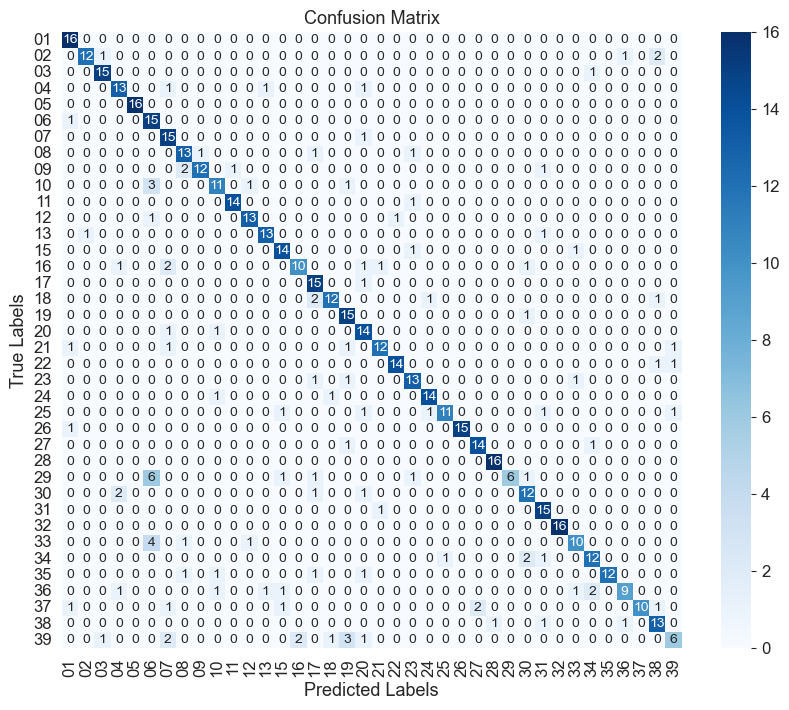

SVC(C=0.001, kernel='linear', max_iter=250, random_state=42)

In [9]:
evaluate_model(svm_classifier, X_train_pca, y_train, X_test_pca, y_test)